*Script criado por Rafael Cesario de Abreu em Jan/2022 para o curso Aplicações em meteorologia usando Python*

*Revisado por Rita Yuri Ynoue e Natália Machado Crespo*

# Aula 1b

Nessa aula, vamos escrever um código para calcular a irradiância solar incidente no topo da atmosfera. Para isso, usaremos as equações que estão no [material complementar](https://drive.google.com/drive/u/1/folders/1Gj0VDOVmmPBrD0S-upUvfewTg_Y_M1Vr). Será mostrado como:
- Manipular datas com o `pandas` (mais sobre o `pandas` na Aula 2)
- Filtragem de dados
- Como fazer figuras com o `matplotlib`
- Como formatar os eixos, e títulos dos gráficos que forem feitos.

Então, como estamos começando um novo jupyter notebook, temos que importar as bibliotecas `numpy` e `pandas`:

**Pacotes**

* **MATPLOTLIB:** Matplotlib é uma biblioteca de visualização 2D que produz figuras com qualidade para publicação em uma variedade de formatos. Ele pode ser usado em scripts python, no IPython shell, jupyter notebook, aplicações web e para interfaces gráficas de usuários. Você pode gerar figuras, histogramas, espectro de potência, gráfico de barras, scatterplots etc., com apenas algumas linhas de código.

In [1]:
import numpy as np
import pandas as pd


Vamos fazer o cálculo da radiação solar incidente nas seguintes partes:
- Ler uma data e hora fornecidos em forma de texto no formato "12:00:00 25/12/2021" e transformar em dia = 359 e hora = 12
- Calcular a declinação solar
- Calcular a equação do tempo
- Calcular a distância com relação a distância média entre Terra e Sol
- Calcular o ângulo zenital solar
- **Finalmente:** Determinar a irradiância de onda curta incidente

In [ ]:
date = pd.to_datetime('12:00:00 25/12/2021', format='%H:%M:%S %d/%m/%Y')

type(date)  # qual o tipo do objeto date?

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
global_day = date.dayofyear  # dia do ano de 1 a 365
hour = date.hour + date.minute / 60.  # data + hora em decimal

print(f'Date {global_day} and hour {hour}')

Date 359 and hour 12.0


In [ ]:
lat = -23.5
lon = -47.5

# constante solar (W/m2)
solar_constant = 1360.8

In [ ]:
theta = 2 * np.pi * (global_day - 1) / 365.

# declinação solar (em radianos)
solar_declivity = 0.006918 - 0.399912 * np.cos(theta) + 0.070257 * np.sin(theta) \
                - 0.006758 * np.cos(2 * theta) + 0.000907 * np.sin(2 * theta) \
                - 0.002697 * np.cos(3 * theta) + 0.00148 * np.sin(3 * theta)

# equação do tempo (em horas)
time_equation = (0.000075 +  0.001868 * np.cos(theta) - 0.0320077 * np.sin(theta) \
              - 0.014615 * np.cos(2 * theta) - 0.040849 * np.sin(2 * theta)) \
              * 24 / (2 * np.pi)

# distância entre o sol e a terra (relativa a distância média)
sun_distance = 1.000110 + 0.034221 * np.cos(theta) + 0.001280 * np.sin(theta) \
             + 0.000719 * np.cos(2 * theta) + 0.000077 * np.sin(2 * theta)

# angulo horario (em graus)
hour_angle = (hour + (lon / 15) - (12 - time_equation)) * 15

# angulo horario e latitude em radianos
hour_angle_rad = np.deg2rad(hour_angle)
lat_rad = np.deg2rad(lat)

**Dica**: Tente nomear as suas variáveis da forma mais clara possível. Para manutenção de código vale muito mais a pena escrever algo como `sun_distance` para falar da distância entre o Sol e a Terra do que definir uma variável `d` ou `dist` que pode significar uma infinidade de coisas. Acredite, o seu eu do futuro vai te agradecer por isso.

In [ ]:
# cosseno do angulo zenital
cos_zenital_angle = np.sin(lat_rad) * np.sin(solar_declivity) \
                  + np.cos(lat_rad) * np.cos(solar_declivity) \
                  * np.cos(hour_angle_rad)

# radiação incidente no topo da atmosfera
downward_sw_radiation = solar_constant * sun_distance * cos_zenital_angle

print(downward_sw_radiation)

1024.646318167246


Se quisermos aplicar esse conjunto de operações para diversos tempos diferentes

In [ ]:
def calculate_downward_sw_radiation(dates, lat, lon):

  # constante solar
  solar_constant = 1360.8

  global_day = dates.dayofyear.values
  hour = dates.hour.values + dates.minute.values / 60.

  theta = 2 * np.pi * (global_day - 1) / 365.

  # declinação solar (em radianos)
  solar_declivity = 0.006918 - 0.399912 * np.cos(theta) + 0.070257 * np.sin(theta) \
                  - 0.006758 * np.cos(2 * theta) + 0.000907 * np.sin(2 * theta) \
                  - 0.002697 * np.cos(3 * theta) + 0.00148 * np.sin(3 * theta)

  # equação do tempo (em horas)
  time_equation = (0.000075 +  0.001868 * np.cos(theta) - 0.0320077 * np.sin(theta) \
                - 0.014615 * np.cos(2 * theta) - 0.040849 * np.sin(2 * theta)) \
                * 24 / (2 * np.pi)

  # distância entre o sol e a terra (relativa a distância média)
  sun_distance = 1.000110 + 0.034221 * np.cos(theta) + 0.001280 * np.sin(theta) \
              + 0.000719 * np.cos(2 * theta) + 0.000077 * np.sin(2 * theta)

  # angulo horario (em graus)
  hour_angle = (hour + (lon / 15) - (12 - time_equation)) * 15

  # angulo horario e latitude em radianos
  hour_angle_rad = np.deg2rad(hour_angle)
  lat_rad = np.deg2rad(lat)

  # cosseno do angulo zenital
  cos_zenital_angle = np.sin(lat_rad) * np.sin(solar_declivity) \
                    + np.cos(lat_rad) * np.cos(solar_declivity) \
                    * np.cos(hour_angle_rad)

  # radiação incidente no topo da atmosfera
  downward_sw_radiation = solar_constant * sun_distance * cos_zenital_angle

  return downward_sw_radiation

In [ ]:
dates = pd.date_range('2015-12-25 00:00:00', '2015-12-28 00:00:00', freq='30min') # Uma data a cada 30 minutos entre 25/12 e 28/12

# calculo da irradiância solar
downward_sw_radiation = calculate_downward_sw_radiation(dates, lat, lon)

downward_sw_radiation

array([-578.77441847, -685.8093898 , -777.29547642, -851.66732602,
       -907.65241564, -944.29282486, -960.96162613, -957.37361163,
       -933.5901733 , -890.01825235, -827.40337643, -746.81690343,
       -649.63769024, -537.52850015, -412.40755248, -276.41570133,
       -131.87980498,   18.7270873 ,  172.82804984,  327.78637244,
        480.95067524,  629.70027456,  771.4900235 ,  903.89386016,
       1024.64631817, 1131.6812895 , 1223.16737612, 1297.53922572,
       1353.52431534, 1390.16472456, 1406.83352583, 1403.24551133,
       1379.462073  , 1335.89015205, 1273.27527613, 1192.68880313,
       1095.50958994,  983.40039985,  858.27945218,  722.28760103,
        577.75170468,  427.1448124 ,  273.04384986,  118.08552726,
        -35.07877555, -183.82837486, -325.6181238 , -458.02196046,
       -577.43509745, -684.72733429, -776.49271208, -851.16109975,
       -907.4549005 , -944.41091178, -961.396806  , -958.12194979,
       -934.64237685, -891.3598292 , -829.01488321, -748.67427

Um plot simples vai ajudar a visualizar melhor se os dados fazem sentido. O que acha, está certo?

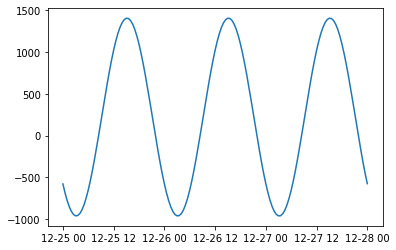

In [ ]:
import matplotlib.pyplot as plt

plt.plot(dates, downward_sw_radiation)

Durante a noite não há radiação solar incidindo, e muito menos radiação negativa. Então vamos transformar esses valores negativos em zero.



In [ ]:
def calculate_downward_sw_radiation(dates, lat, lon):

  # constante solar
  solar_constant = 1360.8

  global_day = dates.dayofyear.values
  hour = dates.hour.values + dates.minute.values / 60.

  theta = 2 * np.pi * (global_day - 1) / 365.

  # declinação solar (em radianos)
  solar_declivity = 0.006918 - 0.399912 * np.cos(theta) + 0.070257 * np.sin(theta) \
                  - 0.006758 * np.cos(2 * theta) + 0.000907 * np.sin(2 * theta) \
                  - 0.002697 * np.cos(3 * theta) + 0.00148 * np.sin(3 * theta)

  # equação do tempo (em horas)
  time_equation = (0.000075 +  0.001868 * np.cos(theta) - 0.0320077 * np.sin(theta) \
                - 0.014615 * np.cos(2 * theta) - 0.040849 * np.sin(2 * theta)) \
                * 24 / (2 * np.pi)

  # distância entre o sol e a terra (relativa a distância média)
  sun_distance = 1.000110 + 0.034221 * np.cos(theta) + 0.001280 * np.sin(theta) \
              + 0.000719 * np.cos(2 * theta) + 0.000077 * np.sin(2 * theta)

  # angulo horario (em graus)
  hour_angle = (hour + (lon / 15) - (12 - time_equation)) * 15

  # angulo horario e latitude em radianos
  hour_angle_rad = np.deg2rad(hour_angle)
  lat_rad = np.deg2rad(lat)

  # cosseno do angulo zenital
  cos_zenital_angle = np.sin(lat_rad) * np.sin(solar_declivity) \
                    + np.cos(lat_rad) * np.cos(solar_declivity) \
                    * np.cos(hour_angle_rad)

  # radiação incidente no topo da atmosfera
  downward_sw_radiation = solar_constant * sun_distance * cos_zenital_angle

  # não há valores abaixo de zero
  downward_sw_radiation[downward_sw_radiation < 0] = 0

  return downward_sw_radiation

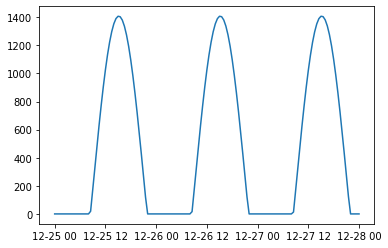

In [ ]:
# calcula a irradiância e faz a figura
downward_sw_radiation = calculate_downward_sw_radiation(dates, lat, lon)

plt.plot(dates, downward_sw_radiation)

Um gráfico pode ser criado com base na linguagem orientada a objeto, em que cada elemento tem seus atributos e métodos específicos. Por exemplo, primeiro criamos uma figura, nela podemos adicionar eixos ou *axis* onde os plots serão inseridos, conforme a figura abaixo. Isso facilita a manipulação dos elementos de forma individual, como adicionar nomes para os eixos, título, formatar o eixo etc.


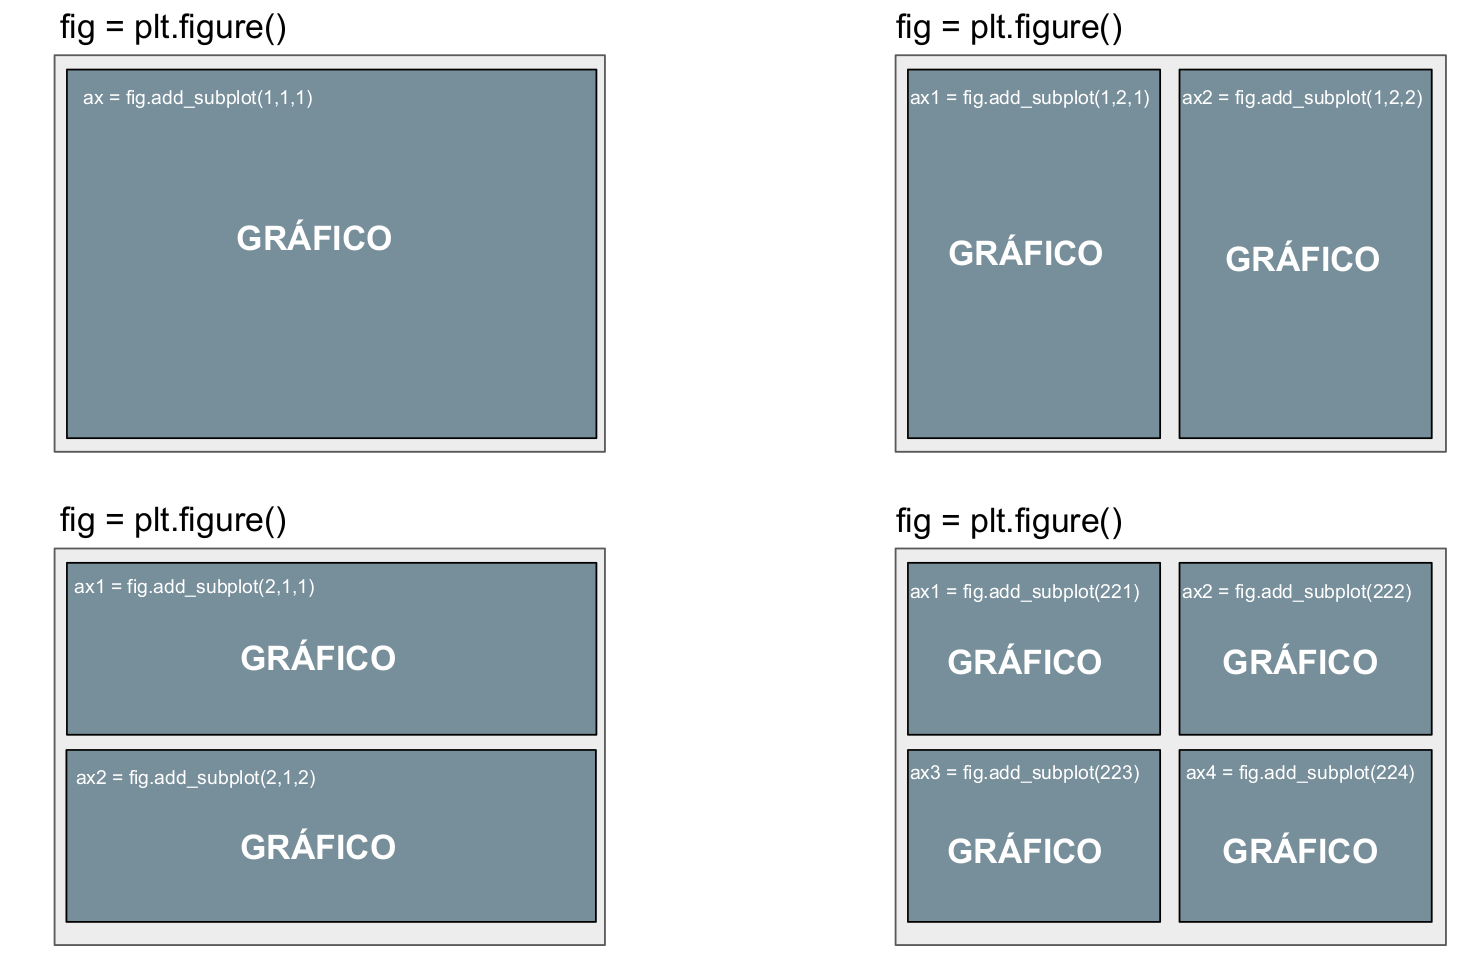

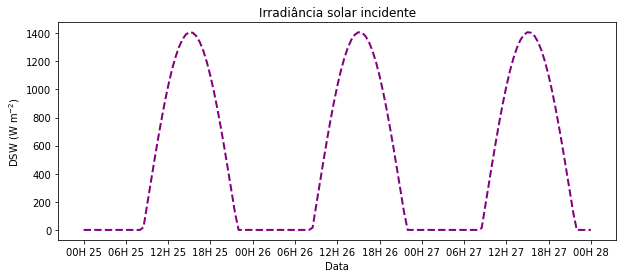

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

ax.plot(dates, downward_sw_radiation, color='purple', ls='--', lw=2)

# adicionando labels
ax.set_title('Irradiância solar incidente')
ax.set_xlabel('Data')
ax.set_ylabel(r'DSW (W m$^{-2}$)')

xticks = pd.date_range(dates[0], dates[-1], freq='6H')

# modificando o formato do eixo x
ax.set_xticks(xticks)
ax.set_xticklabels(xticks.strftime('%HH %d'));

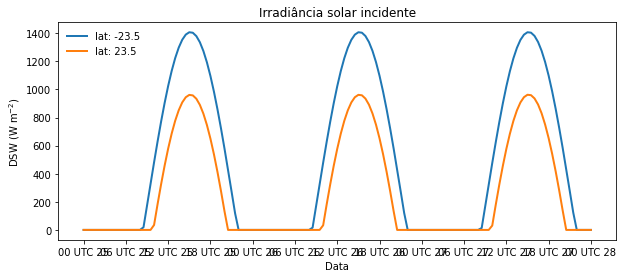

In [ ]:
downward_sw_radiation1 = calculate_downward_sw_radiation(dates, -23.5, -47.5)
downward_sw_radiation2 = calculate_downward_sw_radiation(dates, 23.5, -47.5)

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

ax.plot(dates, downward_sw_radiation1, color='C0', lw=2, label='lat: -23.5')
ax.plot(dates, downward_sw_radiation2, color='C1', lw=2, label='lat: 23.5')

ax.set_title('Irradiância solar incidente')
ax.set_xlabel('Data')
ax.set_ylabel(r'DSW (W m$^{-2}$)')

ax.set_xticks(xticks)
ax.set_xticklabels(xticks.strftime('%H UTC %d'));

# adicionando legenda no canto superior esquerdo sem a caixinha branca em volta
ax.legend(loc='upper left', frameon=False)

(-100.0, 1500.0)

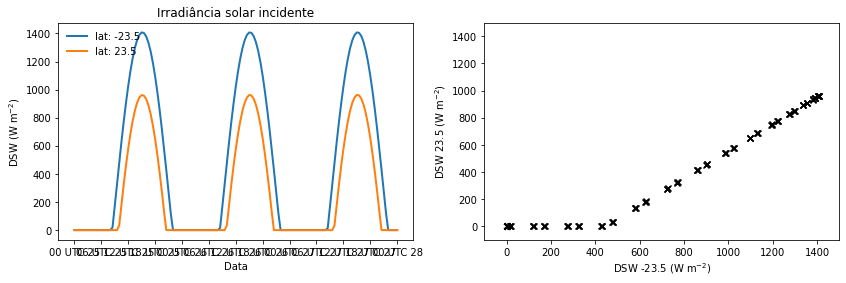

In [ ]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(dates, downward_sw_radiation1, color='C0', lw=2, label='lat: -23.5')
ax1.plot(dates, downward_sw_radiation2, color='C1', lw=2, label='lat: 23.5')

# adicionando scatter de comparação da irradância nos dois lugares
ax2.scatter(downward_sw_radiation1, downward_sw_radiation2, marker='x', color='black')

ax1.set_title('Irradiância solar incidente')
ax1.set_xlabel('Data')
ax1.set_ylabel(r'DSW (W m$^{-2}$)')

ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks.strftime('%H UTC %d'));

ax1.legend(loc='upper left', frameon=False)

ax2.set_xlabel(r'DSW -23.5 (W m$^{-2}$)')
ax2.set_ylabel(r'DSW 23.5 (W m$^{-2}$)')

ax2.set_xlim([-100, 1500])
ax2.set_ylim([-100, 1500])

**Exercício**: Calcule o saldo de radiação para as cidade de Manaus (AM) e Porto Alegre (RS) entre os dias 01/07/2010 e 03/07/2010. Para isso, prossiga da seguinte maneira:
- Defina as funções para: a componente ascendente da radiação de onda curta (considere um albedo fixo de 0.3), a componente ascendente de onda longa (considere um corpo negro, ou seja, emissividade igual a um), e componente descendente da radiação de onda longa (utilize a equação fornecida no material complementar). Para a componente descendente da radiação de onda curta lembre que o que chega na superfície é cerca de 50 % do que chega no topo da atmosfera.
- Utilize os arquivos `manaus.txt` e `porto_alegre.txt` que contém a temperatura (em °C) para os dois locais. Utilize as seguintes coordenadas: Manaus: 3.10333333°S, 60.01638888°W e Porto Alegre: 30.05°S, 51.16666666°W
- Faça três gráficos: um com as componentes individuais para Manaus, o mesmo para Porto Alegre e um terceiro com o saldo de radiação (a soma das componentes individuais) com as curvas para Manaus e Porto Alegre. Não esqueça de formatar os eixos, incluir os títulos das figuras e dos eixos.

Se tiver interesse, modifique os valores de emissividade da superfície e o albedo conforme os tipos de superfícies que estão apresentados no material complementar.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dates = pd.date_range('2010-07-01 00:00:00', '2010-07-03 23:00:00', freq='1H')

t1 = np.loadtxt('/content/drive/Shareddrives/Curso_Python2022/dados_estacoes/manaus.txt')
t2 = np.loadtxt('/content/drive/Shareddrives/Curso_Python2022/dados_estacoes/porto_alegre.txt')

albedo = 0.3

In [4]:
t1

array([28.3, 28.2, 28.2, 27.8, 27.4, 27. , 26.6, 26. , 26.4, 26.3, 26.2,
       26.4, 26.6, 28.1, 28.1, 28.1, 29.3, 29.2, 29.8, 30.1, 29.6, 29.9,
       27.7, 26.2, 25.8, 25.9, 25.8, 25.4, 25. , 25.4, 25.6, 25.9, 25.7,
       25.9, 25.8, 25.4, 26.2, 28.2, 28.9, 29.7, 30.2, 29.3, 28.4, 26. ,
       26.2, 26.2, 25.4, 25.2, 24.8, 24.9, 24.8, 25.4, 25. , 24.9, 24.8,
       23.7, 24.1, 23.8, 23.5, 25.2, 28.1, 28.3, 29.3, 29.9, 30.5, 30.9,
       30. , 31.7, 30.3, 28.6, 27.9, 26.4])